In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import fashion_mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [2]:
def load_data():
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    
    # convert shape of x_train from (60000, 28, 28) to (60000, 784) 
    # 784 columns per row
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)
(X_train, y_train,X_test, y_test)=load_data()
print(X_train.shape)

(60000, 784)


In [3]:
def adam_optimizer():
    return adam(lr=0.0002, beta_1=0.5)

In [4]:
def create_generator():
    generator=Sequential()
    generator.add(Dense(units=256,input_dim=100))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=784, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return generator
g=create_generator()
g.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)              

In [5]:
def create_discriminator():
    discriminator=Sequential()
    discriminator.add(Dense(units=1024,input_dim=784))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    
    discriminator.add(Dense(units=512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    discriminator.add(Dense(units=256))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(units=1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return discriminator
d =create_discriminator()
d.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
__________________________

In [6]:
def create_gan(discriminator, generator):
    discriminator.trainable=False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output= discriminator(x)
    gan= Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan
gan = create_gan(d,g)
gan.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


In [7]:
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
    noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(100,28,28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image %d.png' %epoch)

Epoch 1


  0%|                                                                                         | 0/2048 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:04<00:00, 11.12it/s]


Epoch 2


100%|████████████████████████████████████████████████████████████████████████████| 2048/2048 [9:35:23<00:00, 16.86s/it]


Epoch 3


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:04<00:00, 11.13it/s]


Epoch 4


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:04<00:00, 11.11it/s]


Epoch 5


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:06<00:00, 10.95it/s]


Epoch 6


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:03<00:00, 11.16it/s]


Epoch 7


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:00<00:00, 11.36it/s]


Epoch 8


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:02<00:00, 11.24it/s]


Epoch 9


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:02<00:00, 11.21it/s]


Epoch 10


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:01<00:00, 11.30it/s]


Epoch 11


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:02<00:00, 11.22it/s]


Epoch 12


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:04<00:00, 11.11it/s]


Epoch 13


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:02<00:00, 11.22it/s]


Epoch 14


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:02<00:00, 11.24it/s]


Epoch 15


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:04<00:00, 11.09it/s]


Epoch 16


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:04<00:00, 11.10it/s]


Epoch 17


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:07<00:00, 10.90it/s]


Epoch 18


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:05<00:00, 11.05it/s]


Epoch 19


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:05<00:00, 11.02it/s]


Epoch 20


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:04<00:00, 11.12it/s]


Epoch 21


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:04<00:00, 11.10it/s]


Epoch 22


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:58<00:00, 11.51it/s]


Epoch 23


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:58<00:00, 11.50it/s]


Epoch 24


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:57<00:00, 11.51it/s]


Epoch 25


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:57<00:00, 11.52it/s]


Epoch 26


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:57<00:00, 11.54it/s]


Epoch 27


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:58<00:00, 11.50it/s]


Epoch 28


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:58<00:00, 11.50it/s]


Epoch 29


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:57<00:00, 11.51it/s]


Epoch 30


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:58<00:00, 11.49it/s]


Epoch 31


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:57<00:00, 11.53it/s]


Epoch 32


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:01<00:00, 11.29it/s]


Epoch 33


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:02<00:00, 11.21it/s]


Epoch 34


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:01<00:00, 11.29it/s]


Epoch 35


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:01<00:00, 11.26it/s]


Epoch 36


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:03<00:00, 11.16it/s]


Epoch 37


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:03<00:00, 11.15it/s]


Epoch 38


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:03<00:00, 11.15it/s]


Epoch 39


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:01<00:00, 11.25it/s]


Epoch 40


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:58<00:00, 11.45it/s]


Epoch 41


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:05<00:00, 11.04it/s]


Epoch 42


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:05<00:00, 11.04it/s]


Epoch 43


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:03<00:00, 11.17it/s]


Epoch 44


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:00<00:00, 11.35it/s]


Epoch 45


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:59<00:00, 11.39it/s]


Epoch 46


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:59<00:00, 11.41it/s]


Epoch 47


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:59<00:00, 11.39it/s]


Epoch 48


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:59<00:00, 11.39it/s]


Epoch 49


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:59<00:00, 11.40it/s]


Epoch 50


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:59<00:00, 11.39it/s]


Epoch 51


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:59<00:00, 11.39it/s]


Epoch 52


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:59<00:00, 11.39it/s]


Epoch 53


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:00<00:00, 11.37it/s]


Epoch 54


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:59<00:00, 11.38it/s]


Epoch 55


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:59<00:00, 11.39it/s]


Epoch 56


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:03<00:00, 11.19it/s]


Epoch 57


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:07<00:00, 10.92it/s]


Epoch 58


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:58<00:00, 11.44it/s]


Epoch 59


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:58<00:00, 11.49it/s]


Epoch 60


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:58<00:00, 11.49it/s]


Epoch 61


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:58<00:00, 11.47it/s]


Epoch 62


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:57<00:00, 11.52it/s]


Epoch 63


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:57<00:00, 11.54it/s]


Epoch 64


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:58<00:00, 11.50it/s]


Epoch 65


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:58<00:00, 11.47it/s]


Epoch 66


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:59<00:00, 11.43it/s]


Epoch 67


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:59<00:00, 11.44it/s]


Epoch 68


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:59<00:00, 11.43it/s]


Epoch 69


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:58<00:00, 11.46it/s]


Epoch 70


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:58<00:00, 11.45it/s]


Epoch 71


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:58<00:00, 11.44it/s]


Epoch 72


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:59<00:00, 11.43it/s]


Epoch 73


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:58<00:00, 11.44it/s]


Epoch 74


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:59<00:00, 11.43it/s]


Epoch 75


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:59<00:00, 11.43it/s]


Epoch 76


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:59<00:00, 11.44it/s]


Epoch 77


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:58<00:00, 11.45it/s]


Epoch 78


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:58<00:00, 11.45it/s]


Epoch 79


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:58<00:00, 11.46it/s]


Epoch 80


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:58<00:00, 11.45it/s]


Epoch 81


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:59<00:00, 11.44it/s]


Epoch 82


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:58<00:00, 11.49it/s]


Epoch 83


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:58<00:00, 11.50it/s]


Epoch 84


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:58<00:00, 11.46it/s]


Epoch 85


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:58<00:00, 11.49it/s]


Epoch 86


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:58<00:00, 11.50it/s]


Epoch 87


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:59<00:00, 11.43it/s]


Epoch 88


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:59<00:00, 11.40it/s]


Epoch 89


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:59<00:00, 11.41it/s]


Epoch 90


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:59<00:00, 11.40it/s]


Epoch 91


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:59<00:00, 11.41it/s]


Epoch 92


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:59<00:00, 11.44it/s]


Epoch 93


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:58<00:00, 11.44it/s]


Epoch 94


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:58<00:00, 11.46it/s]


Epoch 95


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:58<00:00, 11.45it/s]


Epoch 96


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:58<00:00, 11.46it/s]


Epoch 97


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:58<00:00, 11.47it/s]


Epoch 98


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:58<00:00, 11.44it/s]


Epoch 99


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:58<00:00, 11.45it/s]


Epoch 100


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [02:58<00:00, 11.46it/s]


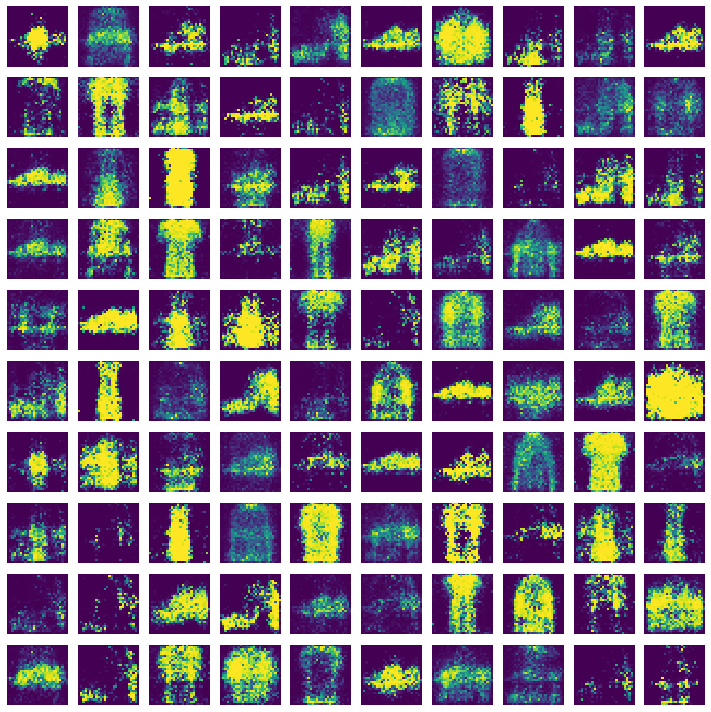

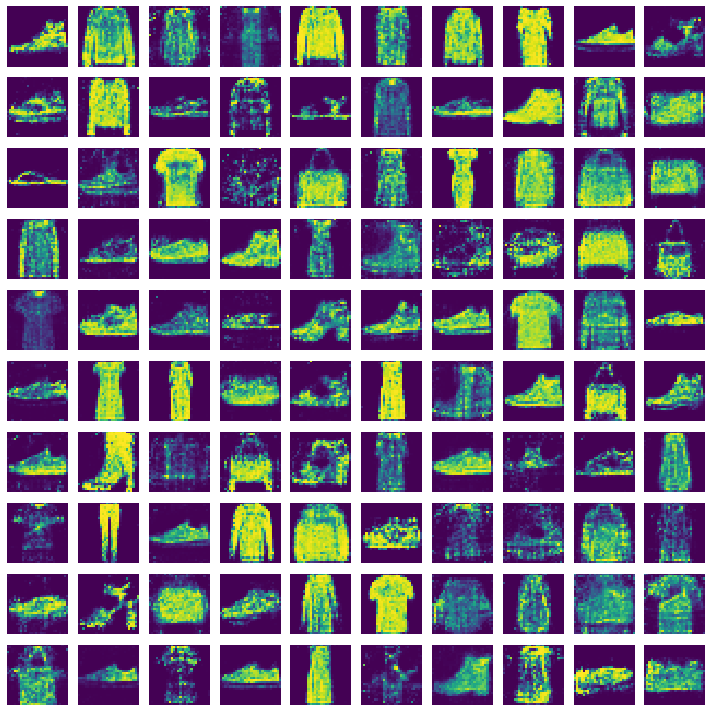

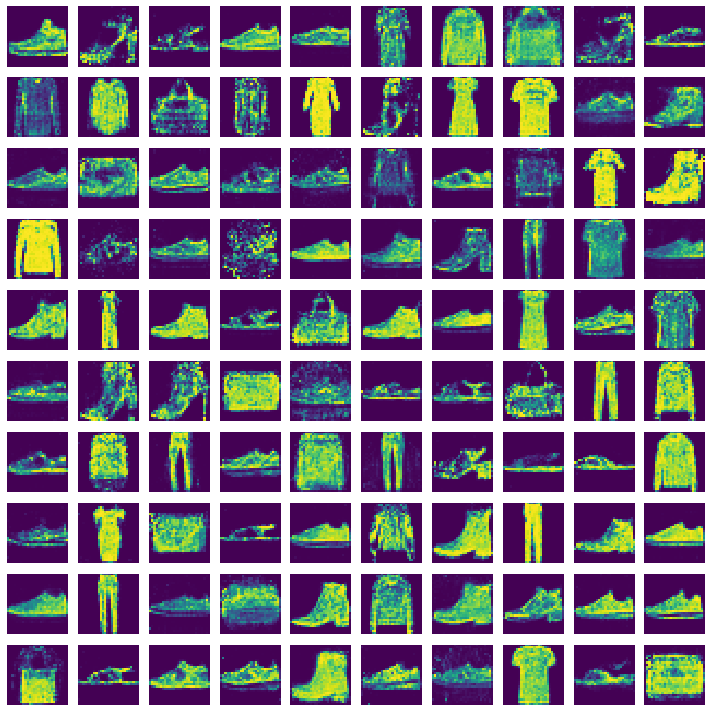

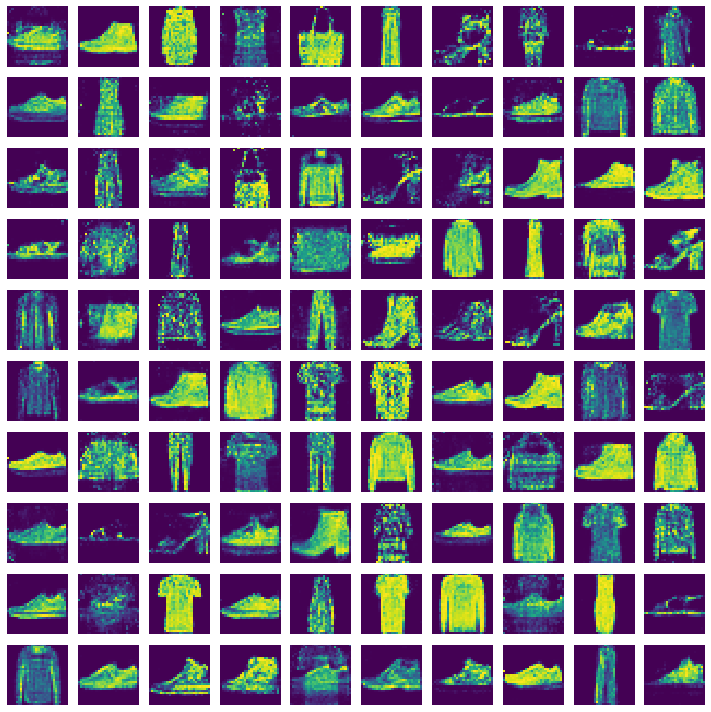

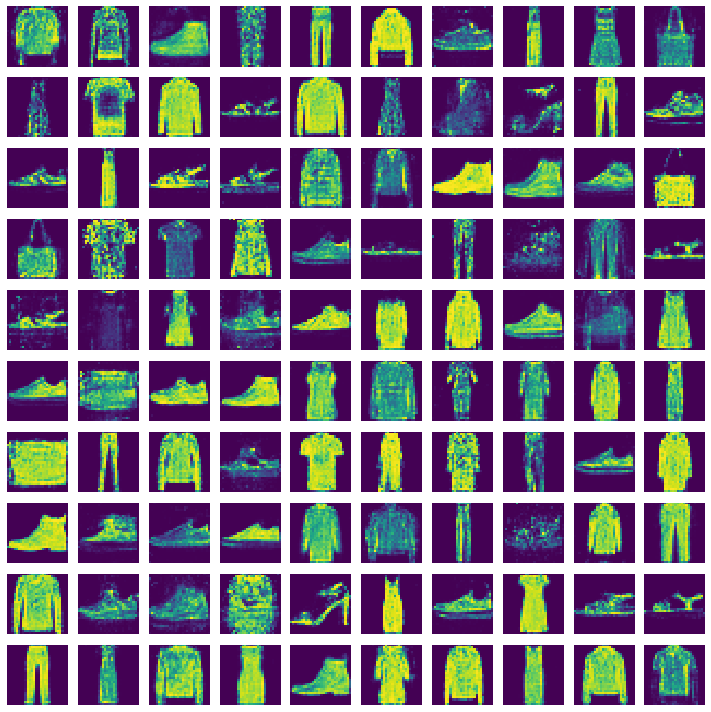

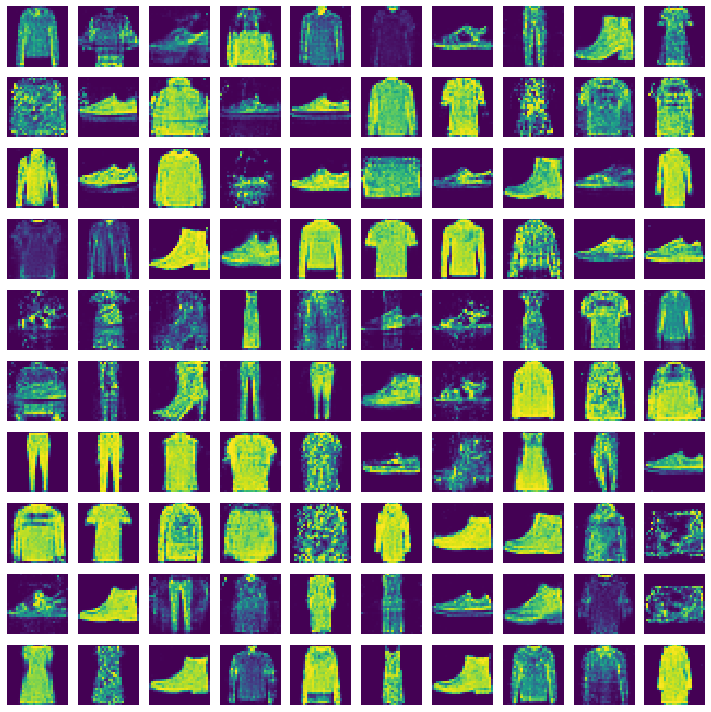

In [8]:
def training(epochs=1, batch_size=2048):
    
    #Loading the data
    (X_train, y_train, X_test, y_test) = load_data()
    batch_count = X_train.shape[0] / batch_size
    
    # Creating GAN
    generator= create_generator()
    discriminator= create_discriminator()
    gan = create_gan(discriminator, generator)
    
    for e in range(1,epochs+1 ):
        print("Epoch %d" %e)
        for _ in tqdm(range(batch_size)):
        #generate  random noise as an input  to  initialize the  generator
            noise= np.random.normal(0,1, [batch_size, 100])
            
            # Generate fake MNIST images from noised input
            generated_images = generator.predict(noise)
            
            # Get a random set of  real images
            image_batch =X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]
            
            #Construct different batches of  real and fake data 
            X= np.concatenate([image_batch, generated_images])
            
            # Labels for generated and real data
            y_dis=np.zeros(2*batch_size)
            y_dis[:batch_size]=0.9
            
            #Pre train discriminator on  fake and real data  before starting the gan. 
            discriminator.trainable=True
            discriminator.train_on_batch(X, y_dis)
            
            #Tricking the noised input of the Generator as real data
            noise= np.random.normal(0,1, [batch_size, 100])
            y_gen = np.ones(batch_size)
            
            # During the training of gan, 
            # the weights of discriminator should be fixed. 
            #We can enforce that by setting the trainable flag
            discriminator.trainable=False
            
            #training  the GAN by alternating the training of the Discriminator 
            #and training the chained GAN model with Discriminator’s weights freezed.
            gan.train_on_batch(noise, y_gen)
            
        if e == 1 or e % 20 == 0:
           
            plot_generated_images(e, generator)
training(100,2048)

In [11]:
import os
#get the current working directory
cwd = os.getcwd()
gan.save_weights(cwd+'/fashion-minst-GAN-weights.h5')